 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [554]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import pathlib
import csv
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [555]:
whalepath = pathlib.Path("Resources/whale_returns.csv")

In [556]:
# Reading whale returns

whale_df = pd.read_csv(whalepath)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [557]:
# Set the date as the index to the DataFrame

whale_df = whale_df.set_index(pd.to_datetime(whale_df["Date"], infer_datetime_format=True))
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [558]:
# Drop the extra date column
whale_df = whale_df.drop(columns=["Date"])
whale_df = whale_df.sort_index(ascending=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [559]:
# Count nulls

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [560]:
# Drop nulls

whale_df = whale_df.dropna().copy()
whale_df

# checking number of nulls again 

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [561]:
# Reading algorithmic returns

algopath = pathlib.Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algopath)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [562]:
# Set the date as the index to the DataFrame

algo_df = algo_df.set_index(pd.to_datetime(algo_df["Date"], infer_datetime_format=True))
algo_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [563]:
# Drop the extra date column

algo_df = algo_df.drop(columns=["Date"])
algo_df = algo_df.sort_index(ascending=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [564]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [565]:
# Drop nulls

algo_df = algo_df.dropna().copy()
algo_df

# checking number of nulls again 

algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [566]:
# Reading S&P TSX 60 Closing Prices

sp_tsx_path = pathlib.Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_path)
sp_tsx_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [567]:
# Check Data Types

sp_tsx_df.dtypes

Date     object
Close    object
dtype: object

In [568]:
# Fix Data Types

sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype(float)
sp_tsx_df["Close"].head()


0    12370.19
1    12391.23
2    12359.47
3    12447.68
4    12418.99
Name: Close, dtype: float64

In [569]:
# checked data types again

sp_tsx_df.dtypes

Date      object
Close    float64
dtype: object

In [570]:
# Set the date as the index to the DataFrame

sp_tsx_df = sp_tsx_df.set_index(pd.to_datetime(sp_tsx_df["Date"], infer_datetime_format=True))
sp_tsx_df.head()

,Date,Close
Date,,
2012-10-01,1-Oct-2012,12370.19
2012-10-02,2-Oct-2012,12391.23
2012-10-03,3-Oct-2012,12359.47
2012-10-04,4-Oct-2012,12447.68
2012-10-05,5-Oct-2012,12418.99


In [571]:
# Drop the extra date column

sp_tsx_df = sp_tsx_df.drop(columns=["Date"])
sp_tsx_df = sp_tsx_df.sort_index(ascending=True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [572]:
# Calculate Daily Returns

sp_tsx_df = sp_tsx_df.pct_change()
sp_tsx_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [573]:
# Drop nulls

sp_tsx_df = sp_tsx_df.dropna().copy()
sp_tsx_df.isnull().sum()

Close    0
dtype: int64

In [574]:
# Rename `Close` Column to be specific to this portfolio.

columns = ["S&P TSX 60"]
sp_tsx_df.columns = columns
sp_tsx_df.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [575]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df,algo_df,sp_tsx_df], axis = "columns", join = "inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of all Portfolios'}, xlabel='Date'>

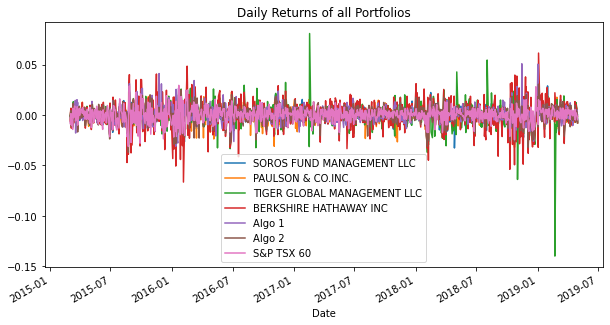

In [576]:
# Plot daily returns of all portfolios

combined_df.plot(figsize=(10,5), title="Daily Returns of all Portfolios")


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

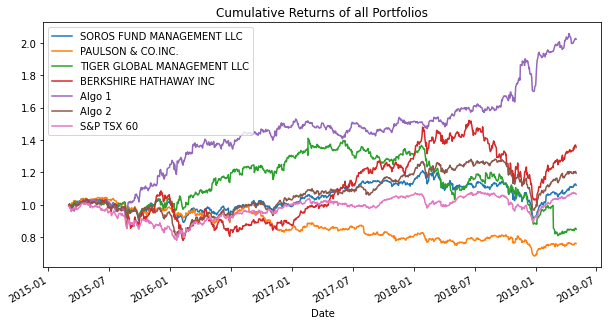

In [577]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df= (1+combined_df).cumprod()
#cumulative_returns_df.head()

# Plot cumulative returns
cumulative_returns_df.plot(figsize=(10,5), title="Cumulative Returns of all Portfolios")

The portfolios that outperform the S&P TSX 60 are algorithm 1, algorithm 2, berkshite hathway inc., and soros fund management LLC. 

Beteen approximately 2018-06 and 2018-10 algorithm 2 and berkshite hathway Inc were relatively close if sometimes under the returns for the S&P TSX 60. Howeverm on average between 2015-01 and 2019-07 they performed better.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

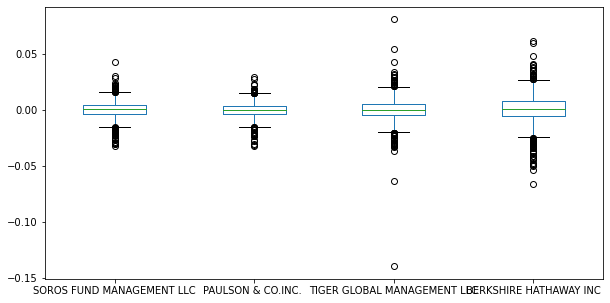

In [578]:
# Box plot to visually show risk

# box plot for whale portfolio
whale_df.plot(kind="box", figsize=(10,5))

<AxesSubplot:>

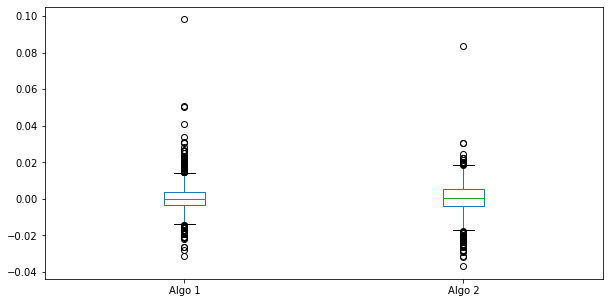

In [579]:
# box plot for the algorithm portfolios 

algo_df.plot(kind="box", figsize=(10,5))

<AxesSubplot:>

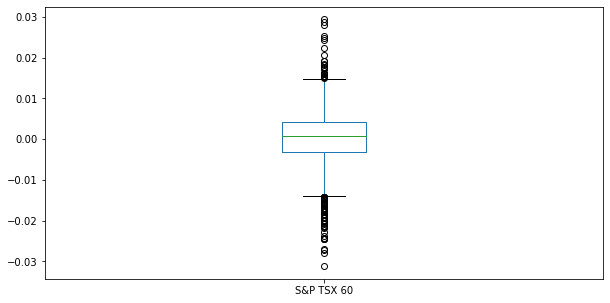

In [580]:
# box plot for the S&P TSX 60 

sp_tsx_df.plot(kind="box", figsize=(10,5))

<AxesSubplot:>

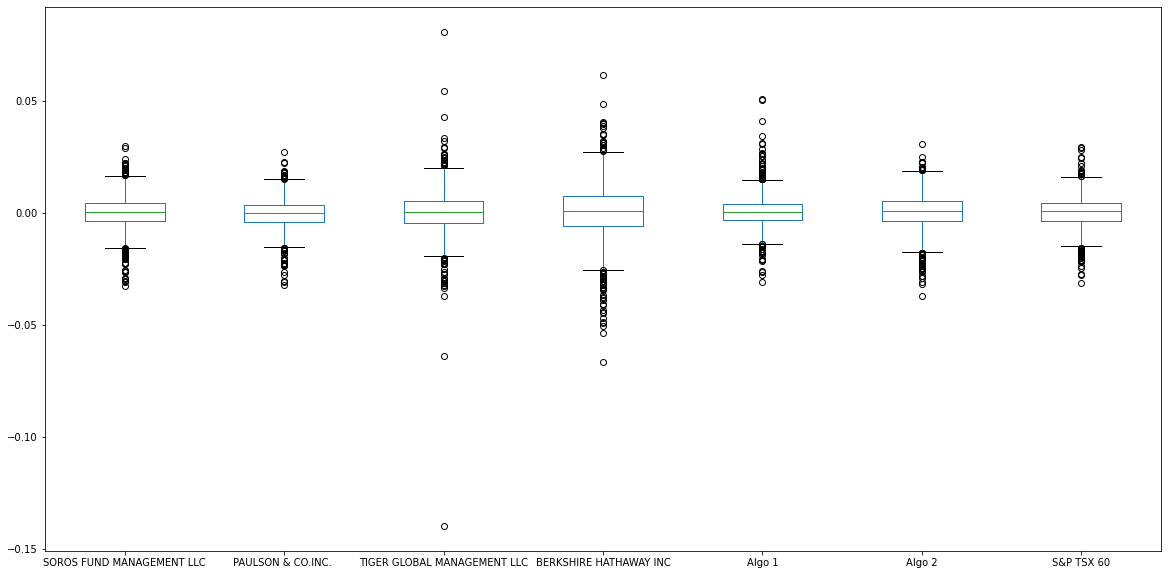

In [581]:
# box plot of all of them together

combined_df.plot(kind="box", figsize=(20,10))

### Calculate Standard Deviations

In [582]:
# Calculate the daily standard deviations of all portfolios

daily_std = combined_df.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [583]:
# Calculate  the daily standard deviation of S&P TSX 60

daily_std_sptsx = sp_tsx_df.std()
print("This is the daily standard deviation of S&P TSX 60:",daily_std_sptsx)

# Determine which portfolios are riskier than the S&P TSX 60
daily_std_whale = whale_df.std()
print("This is the daily standard deviations of whale portfolios:",daily_std_whale)

daily_std_algo = algo_df.std()
print("This is the daily standard deviations of the algorithm trading portfolios:",daily_std_algo)


This is the daily standard deviation of S&P TSX 60: S&P TSX 60    0.006637
dtype: float64
This is the daily standard deviations of whale portfolios: SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
This is the daily standard deviations of the algorithm trading portfolios: Algo 1    0.007988
Algo 2    0.008466
dtype: float64


The portfolios that are riskier than the S&P TSX 60 are all the portfolios because their respective standard deviations are greater than the S&P TSX 60 which is 0.006637. Tiger global managemnet llc and paulson & berkshire hathway inc would be the greatest risk since they have the most variance (highest standard deviations of 0.010824 and 0.012831 respectively). 

### Calculate the Annualized Standard Deviation

In [584]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

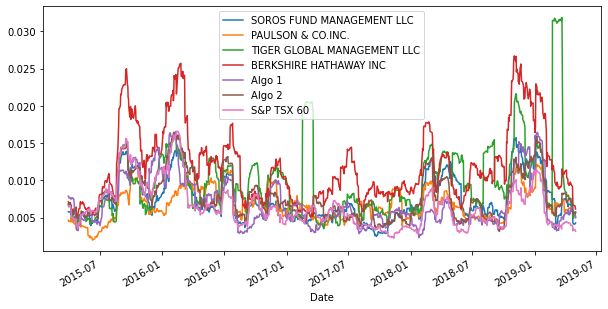

In [585]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

std_21 = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation

std_21.plot(figsize=(10,5))

### Calculate and plot the correlation

The correlations are:
                              SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
S&P TSX 60                                    0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.16

<AxesSubplot:>

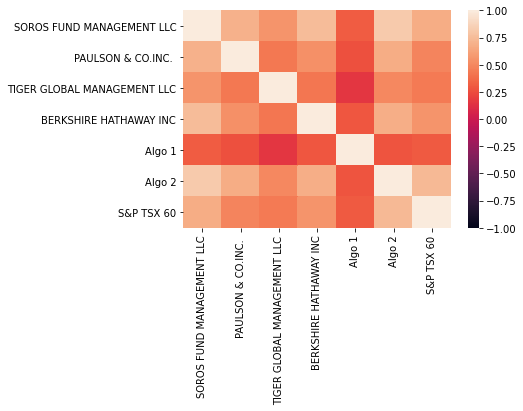

In [586]:
# Calculate the correlation
correlation = combined_df.corr()
print("The correlations are:\n",correlation)

# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

The covariance of berkshire hathway inc is: 5.027336077110027e-05
The variance of S&P TSX 60 is: 4.9479515915131015e-05
The beta value for berkshire hathway inc is: 1.016043909106364


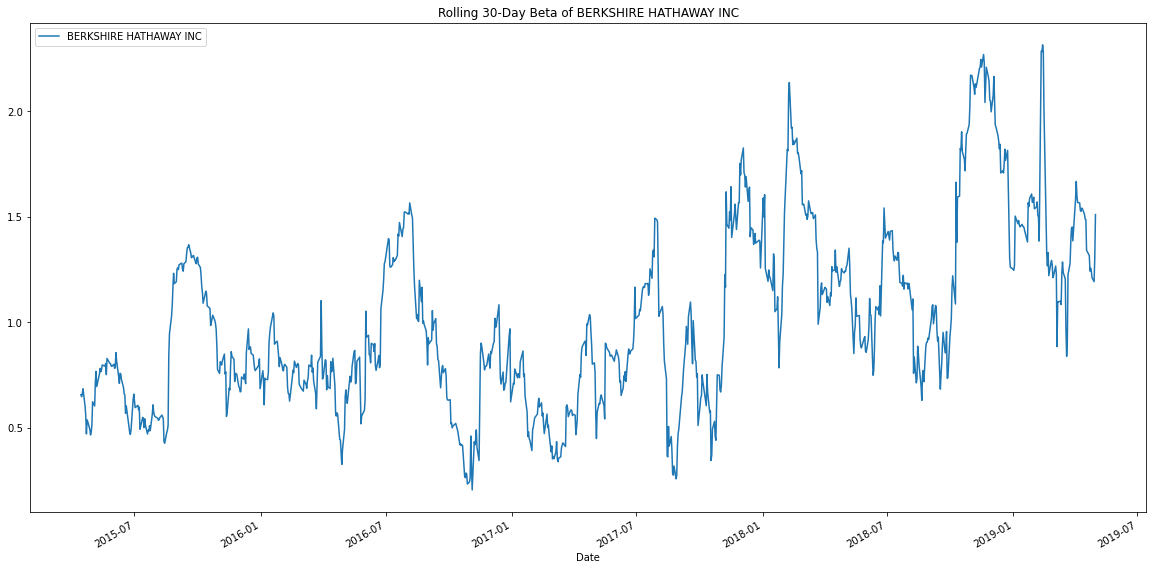

In [587]:
# Calculate covariance of a single portfolio

covariance = combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df["S&P TSX 60"])
print("The covariance of berkshire hathway inc is:", covariance)

# Calculate variance of S&P TSX

variance = combined_df["S&P TSX 60"].var()
print("The variance of S&P TSX 60 is:", variance)


# Computing beta
berk_beta = covariance/variance
print("The beta value for berkshire hathway inc is:",berk_beta)


# Plot beta trend

rolling_berk_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=30).cov(combined_df["S&P TSX 60"])
rolling_variance = combined_df["S&P TSX 60"].rolling(window=30).var()
rolling_berk_beta = rolling_berk_covariance / rolling_variance


ax = rolling_berk_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta of BERKSHIRE HATHAWAY INC")


# Set the legend of the figure
ax.legend(["BERKSHIRE HATHAWAY INC"])

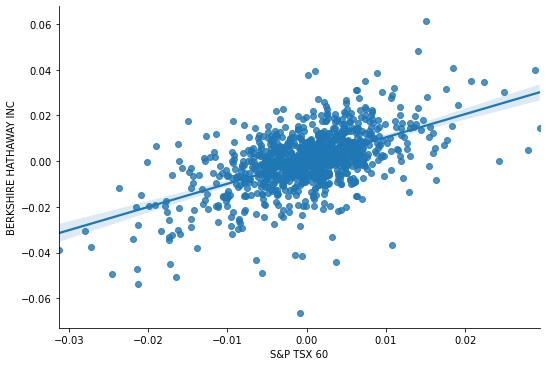

In [588]:
#Beta vs Correlation

import seaborn as sns

sns.lmplot(x="S&P TSX 60", y="BERKSHIRE HATHAWAY INC", data=combined_df, aspect=1.5, fit_reg=True)


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [589]:
# Use `ewm` to calculate the rolling window
ewm_pd = combined_df.ewm(halflife=21).mean()

print("The exponentially weighted moving averages are:\n",ewm_pd)

The exponentially weighted moving averages are:
             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000511           -0.000802   
2015-03-05                   0.001718            0.000878   
2015-03-06                  -0.000808           -0.000291   
2015-03-09                  -0.000511            0.000673   
...                               ...                 ...   
2019-04-25                   0.001277            0.000032   
2019-04-26                   0.001500            0.000329   
2019-04-29                   0.001492            0.000406   
2019-04-30                   0.001402            0.000321   
2019-05-01                   0.001167            0.000268   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
201

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [590]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean()*252)/(annualized_std)
sharpe_ratios

Algo 1                         1.491514
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
PAULSON & CO.INC.             -0.547594
S&P TSX 60                     0.195550
SOROS FUND MANAGEMENT LLC      0.286709
TIGER GLOBAL MANAGEMENT LLC   -0.144455
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

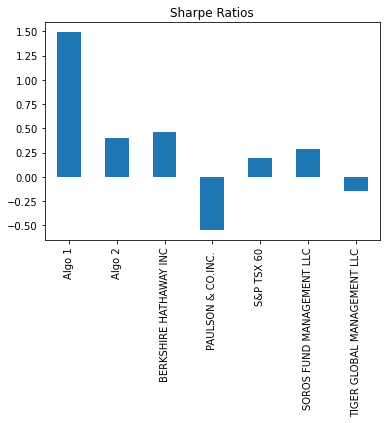

In [591]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic trading strategies outperform the market (S&P TSX 60). Both algorithmic trading strategies outperformed Soros Fund Management LLC and Tiger Global Management LLC. However, algorithm 2 did not outperform Berkshire Hathway INC, only algorithm 1 did. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [592]:
# Reading data from 1st stock
shop_path = pathlib.Path("Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_path,index_col = "Date",infer_datetime_format=True,parse_dates=True)
shop_df = shop_df.sort_index()
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [593]:
# Reading data from 2nd stock
otex_path = pathlib.Path("Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_path,index_col = "Date",infer_datetime_format=True,parse_dates=True)
otex_df = otex_df.sort_index()
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [594]:
# Reading data from 3rd stock
l_path = pathlib.Path("Resources/l_historical.csv")
l_df = pd.read_csv(l_path,index_col = "Date",infer_datetime_format=True,parse_dates=True)
l_df = l_df.sort_index()
l_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [595]:
# Combine all stocks in a single DataFrame
custom_stocks_df = pd.concat([shop_df,otex_df,l_df], axis = "rows", join = "outer")
custom_stocks_df

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [596]:
# Reset Date index

custom_stocks_df = custom_stocks_df.reset_index()
custom_stocks_df

,Date,Symbol,Close
0,2018-01-02,SHOP,132.06
1,2018-01-03,SHOP,135.15
2,2018-01-04,SHOP,137.46
3,2018-01-05,SHOP,137.26
4,2018-01-08,SHOP,139.51
...,...,...,...
1498,2019-12-20,L,67.90
1499,2019-12-23,L,67.68
1500,2019-12-24,L,67.67
1501,2019-12-27,L,67.78


In [597]:
# Reorganize portfolio data by having a column per symbol

custom_stocks_df = custom_stocks_df.pivot_table(values="Close", index="Date", columns="Symbol")
custom_stocks_df.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [598]:
# Calculate daily returns

custom_stocks_df = custom_stocks_df.pct_change()

# Drop NAs

custom_stocks_df.isnull().sum()
custom_stocks_df = custom_stocks_df.dropna().copy()

# Display sample data

custom_stocks_df

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [599]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = custom_stocks_df.dot(weights)

# Display sample data
portfolio_returns


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [600]:
# Join your returns DataFrame to the original returns DataFrame


new_returns_df = pd.concat([portfolio_returns,combined_df], axis = "columns", join = "outer")


column = ["Portfolio", "SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P TSX 60" ]
new_returns_df.columns = column 
new_returns_df


,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2015-03-03,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...,...
2019-12-20,0.007495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-23,-0.006607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,0.006331,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [601]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

new_returns_df.isnull().sum()
new_returns_df = new_returns_df.dropna().copy()
new_returns_df


,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [602]:
# Calculate the annualized `std`
new_daily_std = new_returns_df.std()
new_daily_std = new_daily_std.sort_values(ascending=False)

new_annualized_std = new_daily_std * np.sqrt(252)
new_annualized_std

BERKSHIRE HATHAWAY INC         0.227445
Portfolio                      0.224346
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
S&P TSX 60                     0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

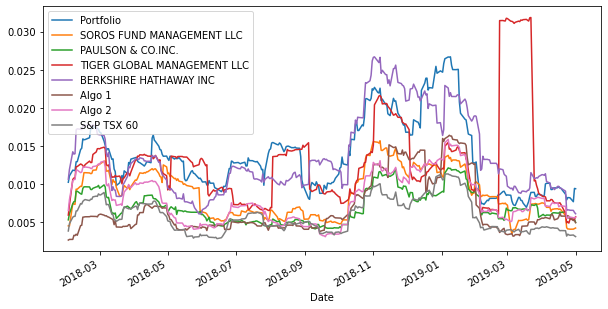

In [603]:
# Calculate rolling standard deviation

new_std_21 = new_returns_df.rolling(window=21).std()

# Plot rolling standard deviation

new_std_21.plot(figsize=(10,5))

### Calculate and plot the correlation

<AxesSubplot:>

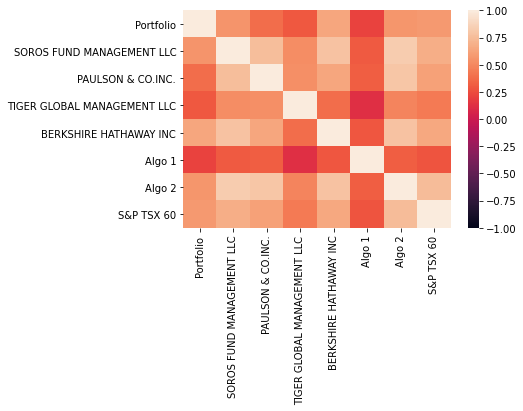

In [604]:
# Calculate and plot the correlation

new_correlation = new_returns_df.corr()
new_correlation

sns.heatmap(new_correlation, vmin=-1, vmax=1)

In [605]:
new_returns_df.head()

,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

The covariance for the custom portfolio of mine is: 5.111305460230443e-05
The variance for S&P TSX 60 is: 3.898788619333669e-05
The beta for my portfolio is: 1.3109983534075265


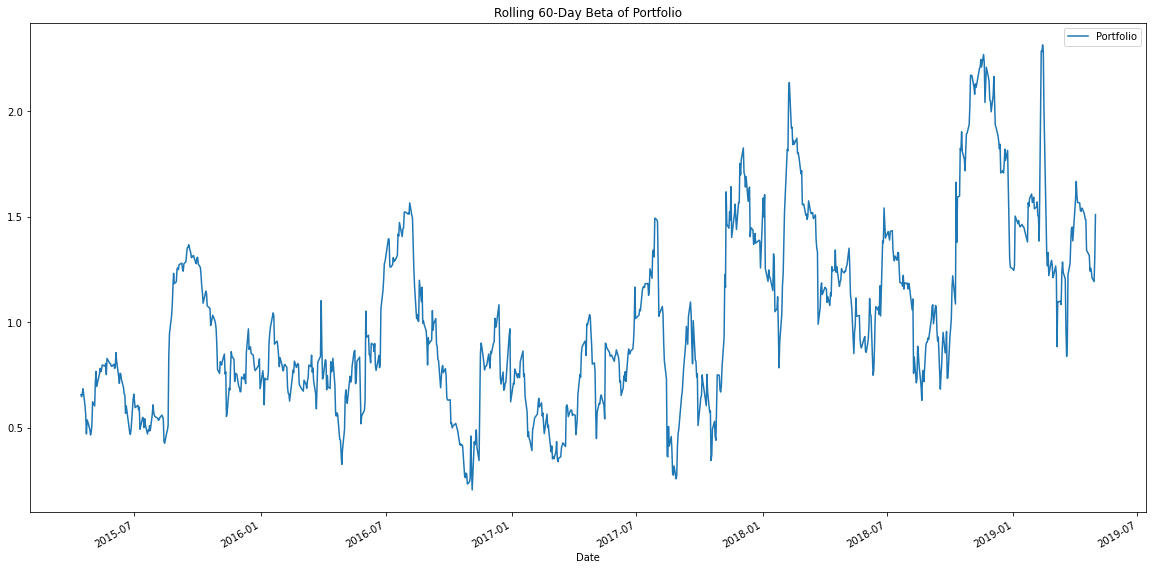

In [606]:
# Calculate and plot Beta

new_covariance = new_returns_df["Portfolio"].cov(new_returns_df["S&P TSX 60"])
print("The covariance for the custom portfolio of mine is:", new_covariance)
new_variance = new_returns_df["S&P TSX 60"].var()
print("The variance for S&P TSX 60 is:", new_variance)
portfolio_beta = new_covariance/new_variance
print("The beta for my portfolio is:", portfolio_beta)

rolling_portfolio_covariance = new_returns_df["Portfolio"].rolling(window=60).cov(new_returns_df["S&P TSX 60"])
rolling_new_variance = new_returns_df["S&P TSX 60"].rolling(window=60).var()
rolling_portfolio_beta = rolling_portfolio_covariance / rolling_new_variance


ax = rolling_berk_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Portfolio")

ax.legend(["Portfolio"])



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [607]:
# Calculate Annualzied Sharpe Ratios

new_sharpe_ratios = (new_returns_df.mean()*252)/(new_annualized_std)
new_sharpe_ratios

Algo 1                         1.901461
Algo 2                         0.021394
BERKSHIRE HATHAWAY INC         0.195907
PAULSON & CO.INC.             -0.396282
Portfolio                      1.564547
S&P TSX 60                     0.034651
SOROS FUND MANAGEMENT LLC     -0.088196
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

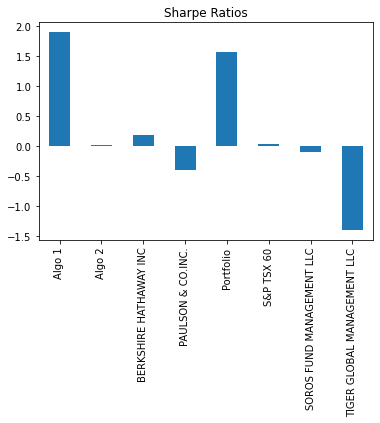

In [608]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

My portfolio outperforms all the other portfolios, except for the first algorithmic trading strategy (Algo 1). However, it does still quite well when compare the magnitude of the 2!
